
# Character Recognition with  EasyOCR

#### **Install EasyOCR**

In [ ]:
# Install PyTesseract and easyOCR
!pip install easyocr

## **EASY OCR**

## **Detect Text in Image and Show our Input Image**

In [14]:
# import the necessary packages
from matplotlib import pyplot as plt
from easyocr import Reader
import pandas as pd
import cv2
import time

In [15]:
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

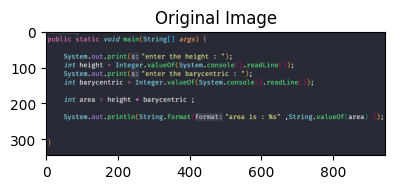

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Detecting and OCR'ing text from input image...
Completed in 1.580167293548584 seconds


In [16]:
# load the input image from disk
image = cv2.imread("./imgs/1.PNG")
imshow("Original Image", image, size = 12)

# OCR the input image using EasyOCR
print("Detecting and OCR'ing text from input image...")
reader = Reader(['en'], gpu = True)

ts = time.time()
results = reader.readtext(image)
te = time.time()
td = te - ts
print(f'Completed in {td} seconds')

In [17]:
results[0]

([[3, 0], [35, 0], [35, 11], [3, 11]], 'Run', 0.6551313789515014)

## **Display Text Overlaid onto our Image**

 Probability of Text: 65.513% OCR'd Text: Run
 Probability of Text: 51.376% OCR'd Text: Dedug
 Probability of Text: 99.823% OCR'd Text: public static
 Probability of Text: 80.184% OCR'd Text: void main(String[ ]
 Probability of Text: 99.979% OCR'd Text: args)
 Probability of Text: 96.966% OCR'd Text: System.out.print(s:
 Probability of Text: 100.000% OCR'd Text: enter
 Probability of Text: 99.805% OCR'd Text: the height
 Probability of Text: 93.649% OCR'd Text: int height
 Probability of Text: 90.456% OCR'd Text: Integer.valueOf(System.console
 Probability of Text: 99.717% OCR'd Text: readLine
 Probability of Text: 75.242% OCR'd Text: ) )
 Probability of Text: 97.037% OCR'd Text: System.out.print(s:
 Probability of Text: 100.000% OCR'd Text: enter
 Probability of Text: 99.961% OCR'd Text: the barycentric
 Probability of Text: 91.785% OCR'd Text: );
 Probability of Text: 99.951% OCR'd Text: int barycentric
 Probability of Text: 64.709% OCR'd Text: Integer.valueOf (System.console
 Probab

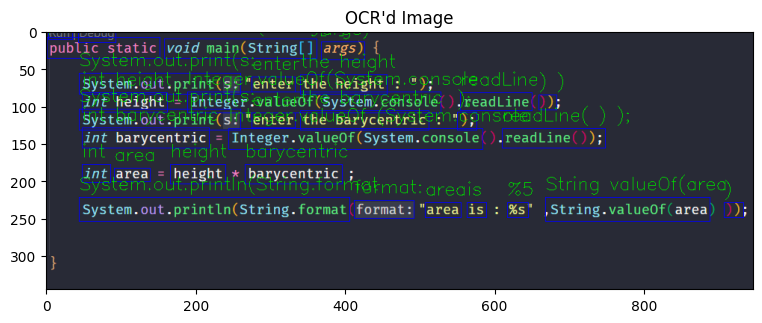

In [18]:
all_text = []

# iterate over our extracted text 
for (bbox, text, prob) in results:
    # display the OCR'd text and the associated probability of it being text
    print(f" Probability of Text: {prob*100:.3f}% OCR'd Text: {text}")

    # get the bounding box coordinates
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))

    # Remove non-ASCII characters from the text so that
    # we can draw the box surrounding the text overlaid onto the original image
    text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
    all_text.append(text)
    cv2.rectangle(image, tl, br, (255, 0, 0), 1)
    cv2.putText(image, text, (tl[0], tl[1] - 10),
      cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 220, 0), 1)

# show the output image
imshow("OCR'd Image", image, size = 25)

## **Run on our WoolWorth Reciept**

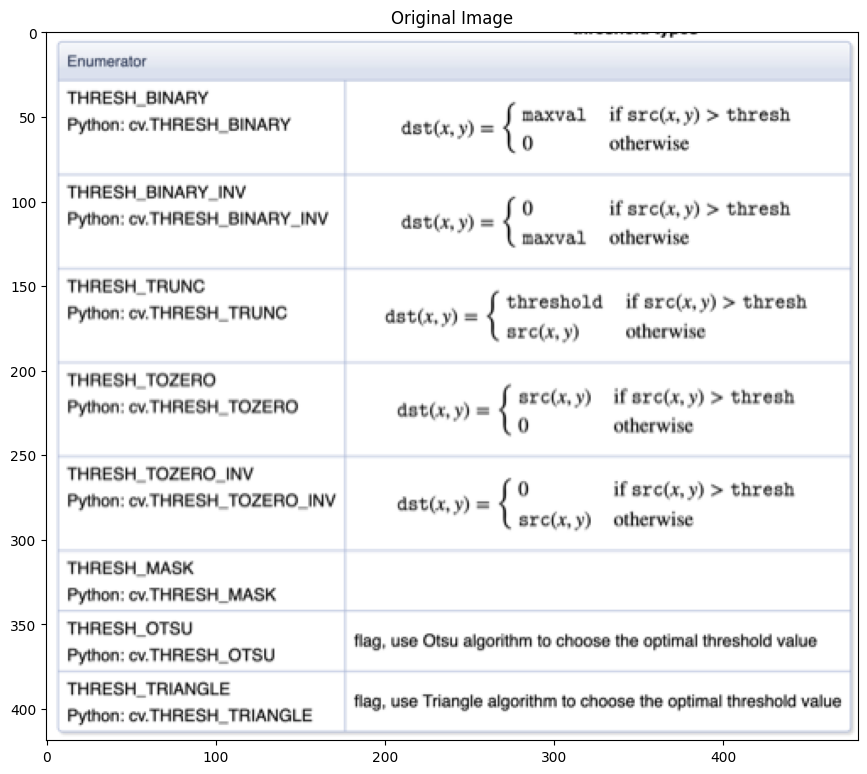

Using CPU. Note: This module is much faster with a GPU.


Detecting and OCR'ing text from input image...
Completed in 1.8540370464324951 seconds
 Probability of Text: 36.649% OCR'd Text: Enumeraion
 Probability of Text: 42.071% OCR'd Text: THAESH BINARY
 Probability of Text: 56.239% OCR'd Text: Pylnon: CV.THRESH_BINARY
 Probability of Text: 60.937% OCR'd Text: Eaxval
 Probability of Text: 30.001% OCR'd Text: if srclx,y)
 Probability of Text: 28.311% OCR'd Text: tbresh
 Probability of Text: 11.593% OCR'd Text: dse(t
 Probability of Text: 84.785% OCR'd Text: otherwise
 Probability of Text: 61.941% OCR'd Text: THAESH_BINARY_INV
 Probability of Text: 48.893% OCR'd Text: Pylhon: Cv THRESH_BINARY_INV
 Probability of Text: 29.539% OCR'd Text: dst(xY)
 Probability of Text: 49.555% OCR'd Text: if srcly)
 Probability of Text: 99.893% OCR'd Text: thresh
 Probability of Text: 56.267% OCR'd Text: maxval
 Probability of Text: 92.304% OCR'd Text: otherwise
 Probability of Text: 73.337% OCR'd Text: THAESH_TRUNC
 Probability of Text: 96.647% OCR'd Text: thres

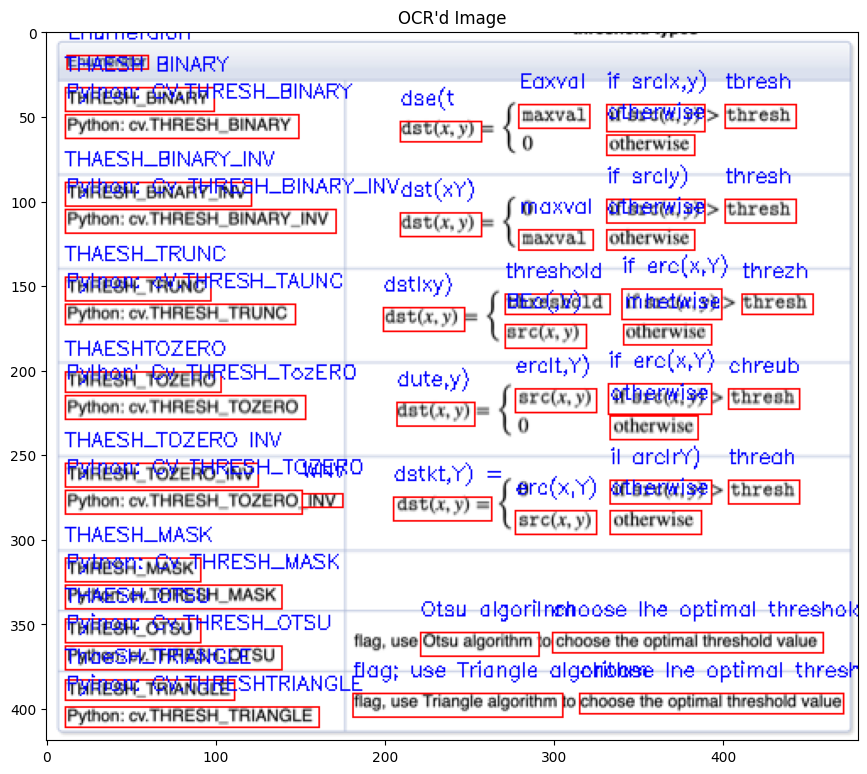

In [19]:
# test another image
image = cv2.imread("./imgs/2.PNG")
imshow("Original Image", image, size = 12)

# OCR the input image using EasyOCR
print("Detecting and OCR'ing text from input image...")
reader = Reader(['en'], gpu = False)

ts = time.time()
results = reader.readtext(image)
te = time.time()
td = te - ts
print(f'Completed in {td} seconds')
all_text = []

# iterate over our extracted text 
for (bbox, text, prob) in results:
    # display the OCR'd text and the associated probability of it being text
    print(f" Probability of Text: {prob*100:.3f}% OCR'd Text: {text}")

    # get the bounding box coordinates
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))

    # Remove non-ASCII characters from the text so that
    # we can draw the box surrounding the text overlaid onto the original image
    text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
    all_text.append(text)
    cv2.rectangle(image, tl, br, (0, 0, 255), 1)
    cv2.putText(image, text, (tl[0], tl[1] - 10),
      cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 0, 0), thickness=1 )

# show the output image
imshow("OCR'd Image", image, size = 12)